**LIBRARY IMPORTING**

In [1]:
import pandas as pd
import numpy as np
import matplotlib
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.impute import KNNImputer
import seaborn as sns
import matplotlib.pyplot as plt

**PATH ALLOCATION OR READING**

In [2]:
file_path = r"E:\YouTube\youtube_ad_revenue_dataset.csv"
df = pd.read_csv(file_path)

**EDA STEPS**

In [4]:
# To see the Total Rows and Columns
df.shape

(122400, 12)

In [5]:
# Preview the first few rows
df.head()

,video_id,date,views,likes,comments,watch_time_minutes,video_length_minutes,subscribers,category,device,country,ad_revenue_usd
0,vid_3092,2024-09-24 10:50:40.993199,9936,1221.0,320.0,26497.214184,2.862137,228086,Entertainment,TV,IN,203.178237
1,vid_3459,2024-09-22 10:50:40.993199,10017,642.0,346.0,15209.747445,23.738069,736015,Gaming,Tablet,CA,140.880508
2,vid_4784,2024-11-21 10:50:40.993199,10097,1979.0,187.0,57332.658498,26.200634,240534,Education,TV,CA,360.134008
3,vid_4078,2025-01-28 10:50:40.993199,10034,1191.0,242.0,31334.517771,11.770340,434482,Entertainment,Mobile,UK,224.638261
4,vid_3522,2025-04-28 10:50:40.993199,9889,1858.0,477.0,15665.666434,6.635854,42030,Education,Mobile,CA,165.514388


In [14]:
# To See the Columns Name
df.columns.to_list()


['video_id',
 'date',
 'views',
 'likes',
 'comments',
 'watch_time_minutes',
 'video_length_minutes',
 'subscribers',
 'category',
 'device',
 'country',
 'ad_revenue_usd']

In [78]:
df.nunique()

video_id                  5000
date                       365
views                      736
likes                     4746
comments                  1809
watch_time_minutes      119359
video_length_minutes    120000
subscribers             113254
category                     6
device                       4
country                      6
ad_revenue_usd          120000
Views_Outlier_Flag           2
engagement_rate         111621
watch_per_view          119997
dtype: int64

In [16]:
# To see the each columns data types
df.dtypes

video_id                 object
date                     object
views                     int64
likes                   float64
comments                float64
watch_time_minutes      float64
video_length_minutes    float64
subscribers               int64
category                 object
device                   object
country                  object
ad_revenue_usd          float64
dtype: object

In [10]:
# To see information like data type and missing values also
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122400 entries, 0 to 122399
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   video_id              122400 non-null  object 
 1   date                  122400 non-null  object 
 2   views                 122400 non-null  int64  
 3   likes                 116283 non-null  float64
 4   comments              116288 non-null  float64
 5   watch_time_minutes    116295 non-null  float64
 6   video_length_minutes  122400 non-null  float64
 7   subscribers           122400 non-null  int64  
 8   category              122400 non-null  object 
 9   device                122400 non-null  object 
 10  country               122400 non-null  object 
 11  ad_revenue_usd        122400 non-null  float64
dtypes: float64(5), int64(2), object(5)
memory usage: 11.2+ MB


In [11]:
# To see Data's statistics summary
df.describe().T

,count,mean,std,min,25%,50%,75%,max
views,122400.0,9999.856283,99.881260,9521.000000,9933.000000,10000.000000,10067.000000,10468.000000
likes,116283.0,1099.633618,519.424089,195.000000,650.000000,1103.000000,1547.000000,2061.000000
comments,116288.0,274.396636,129.741739,48.000000,162.000000,274.000000,387.000000,515.000000
watch_time_minutes,116295.0,37543.827721,12987.724246,14659.105562,26366.320569,37531.990337,48777.782090,61557.670089
video_length_minutes,122400.0,16.014165,8.083790,2.000142,9.004695,16.005906,23.021260,29.999799
subscribers,122400.0,502191.719902,288397.470103,1005.000000,252507.500000,503465.500000,752192.000000,999997.000000
ad_revenue_usd,122400.0,252.727210,61.957052,126.590603,199.902018,252.749699,305.597518,382.768254


In [17]:
#To see the Null values in each columns
df.isnull().sum()


video_id                   0
date                       0
views                      0
likes                   6117
comments                6112
watch_time_minutes      6105
video_length_minutes       0
subscribers                0
category                   0
device                     0
country                    0
ad_revenue_usd             0
dtype: int64

In [18]:
#To see the percentage of Null values in each column
(df.isnull().sum() / len(df)) * 100

video_id                0.000000
date                    0.000000
views                   0.000000
likes                   4.997549
comments                4.993464
watch_time_minutes      4.987745
video_length_minutes    0.000000
subscribers             0.000000
category                0.000000
device                  0.000000
country                 0.000000
ad_revenue_usd          0.000000
dtype: float64

In [19]:
# To see the Duplicates rows available
df.duplicated().sum()

np.int64(2400)

In [21]:
#To see the duplicate rows in our data
temp_var = df[df.duplicated(keep=False)] #temporary variable is created to store duplicate data


In [22]:
#Temporary variable sorted is created to see duplicates rows sorted by video id & date
sorted = temp_var.sort_values(by=['video_id', 'date'])
sorted

,video_id,date,views,likes,comments,watch_time_minutes,video_length_minutes,subscribers,category,device,country,ad_revenue_usd
27583,vid_10,2024-11-25 10:50:40.993199,10001,1877.0,316.0,45099.652444,26.862350,653429,Lifestyle,TV,DE,302.424925
101218,vid_10,2024-11-25 10:50:40.993199,10001,1877.0,316.0,45099.652444,26.862350,653429,Lifestyle,TV,DE,302.424925
62274,vid_1003,2024-08-24 10:50:40.993199,10038,1983.0,NaN,20195.328013,15.438654,648274,Lifestyle,TV,IN,189.141287
121655,vid_1003,2024-08-24 10:50:40.993199,10038,1983.0,NaN,20195.328013,15.438654,648274,Lifestyle,TV,IN,189.141287
69681,vid_1003,2025-01-18 10:50:40.993199,10010,1502.0,182.0,41836.974016,20.930565,850239,Lifestyle,Mobile,DE,278.341442
...,...,...,...,...,...,...,...,...,...,...,...,...
98228,vid_996,2024-10-31 10:50:40.993199,9753,242.0,476.0,41331.898554,19.667345,680781,Music,Tablet,IN,258.018193
51660,vid_997,2025-04-25 10:50:40.993199,9993,1970.0,185.0,22818.396793,24.373115,893529,Music,TV,AU,196.684348
86871,vid_997,2025-04-25 10:50:40.993199,9993,1970.0,185.0,22818.396793,24.373115,893529,Music,TV,AU,196.684348
48302,vid_999,2024-09-15 10:50:40.993199,9860,1541.0,472.0,35614.864714,26.618876,962885,Lifestyle,Tablet,CA,253.880166


In [23]:
#Just for reference lets save the duplicate data in one CSV
sorted.to_csv("E:\YouTube\duplicates_backup.csv", index=False)


In [3]:
# To drop duplicates from our dataframe
df.drop_duplicates(inplace=True)


In [25]:
df.duplicated().sum()

np.int64(0)

In [4]:
numeric_cols = df.select_dtypes(include='number').columns.tolist()
category_cols = df.select_dtypes(exclude='number').columns.tolist()

print("Numeric columns:", numeric_cols)
print("Categorical columns:", category_cols)

Numeric columns: ['views', 'likes', 'comments', 'watch_time_minutes', 'video_length_minutes', 'subscribers', 'ad_revenue_usd']
Categorical columns: ['video_id', 'date', 'category', 'device', 'country']


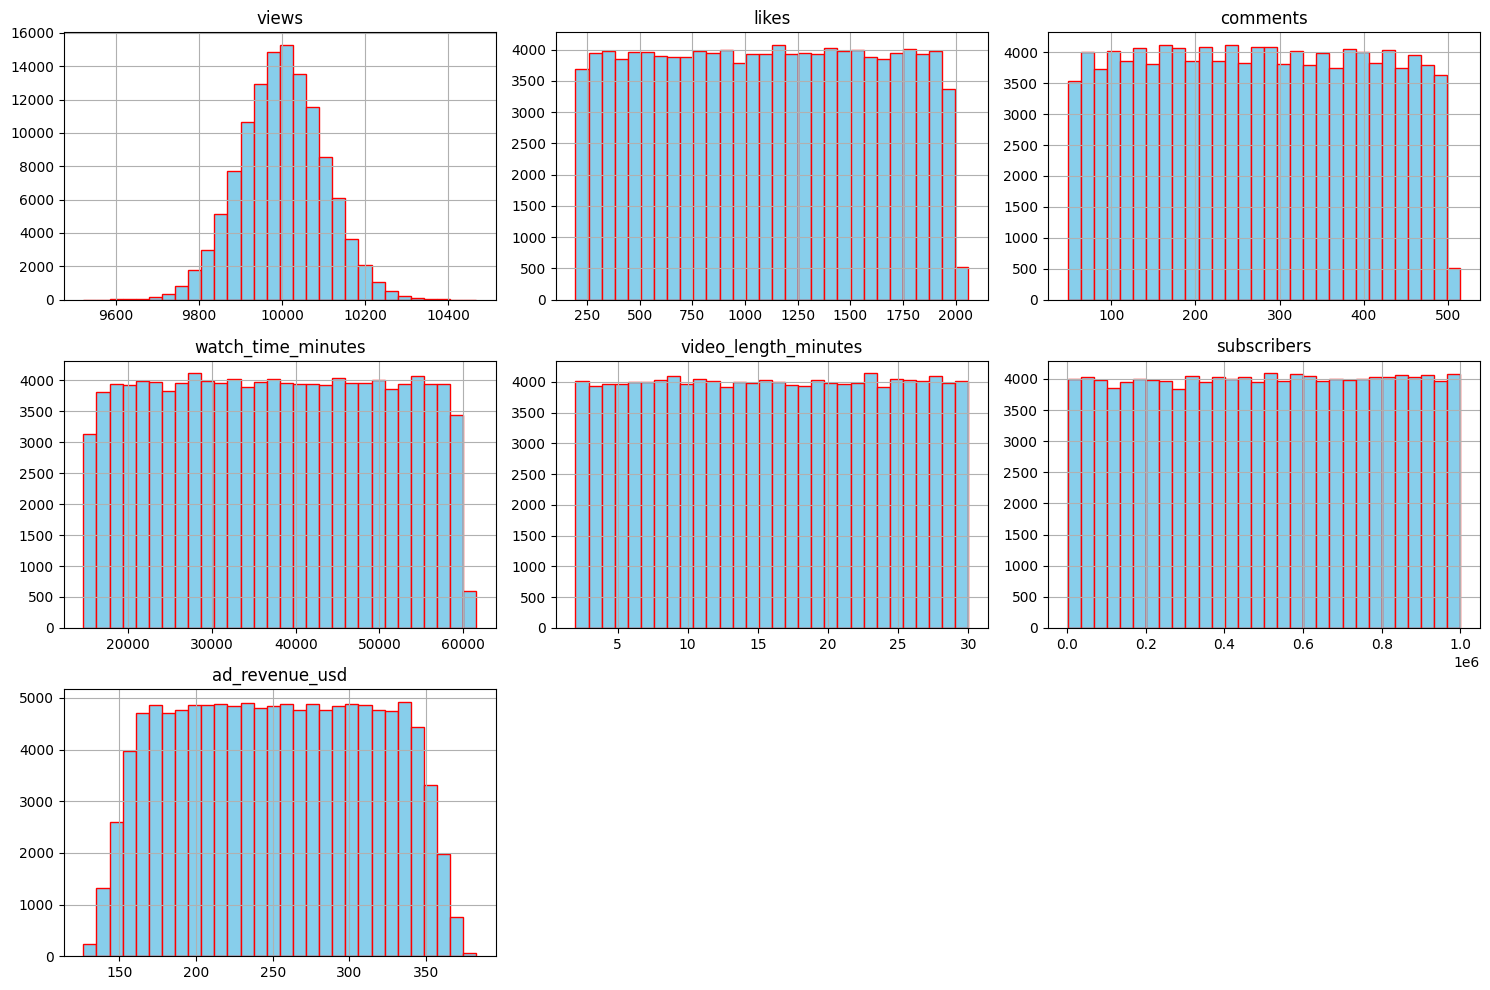

In [27]:
# (Histograms → Only for Numeric Columns)


import matplotlib.pyplot as plt

df[numeric_cols].hist(bins=30, figsize=(15, 10), color='skyblue', edgecolor='red')
plt.tight_layout()
plt.show()

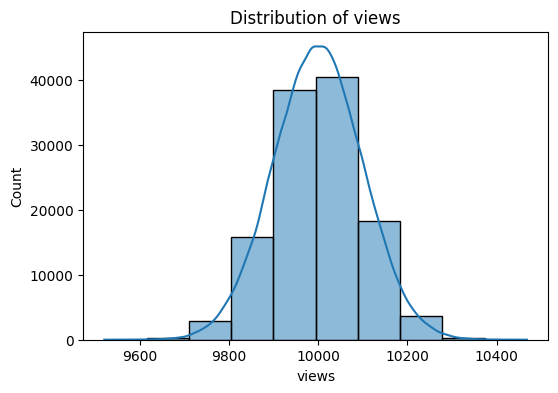

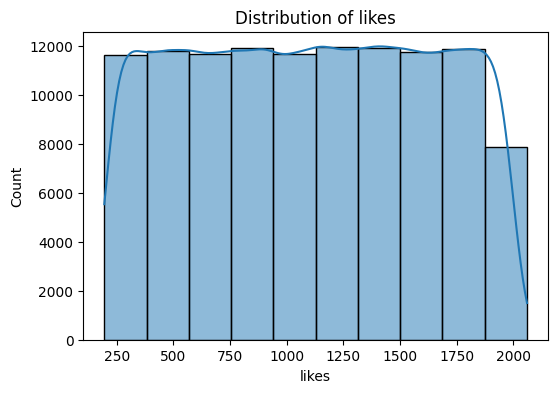

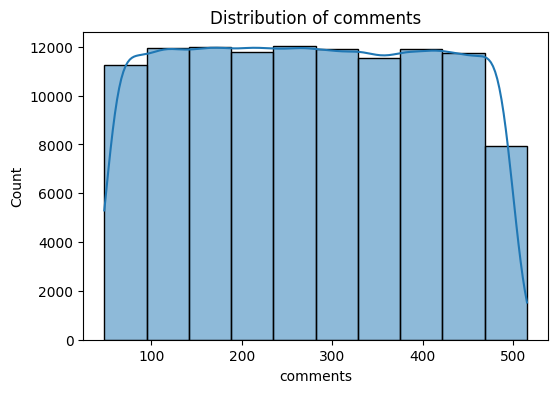

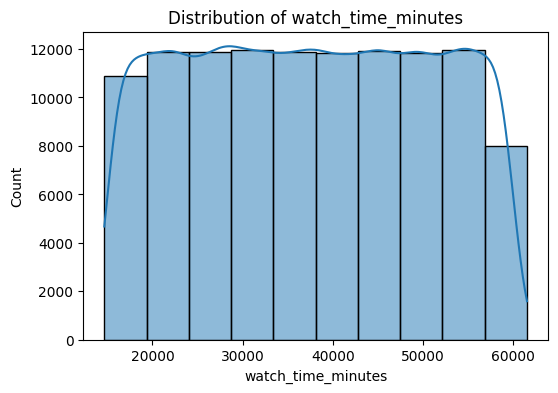

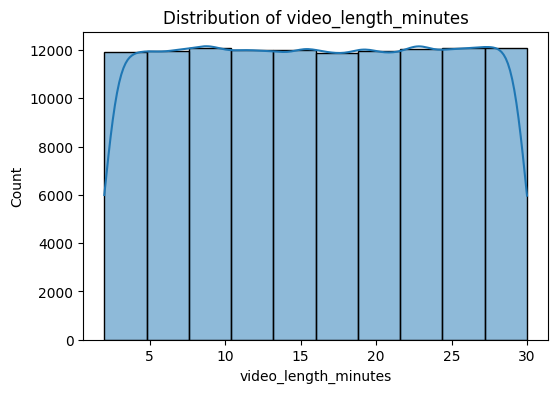

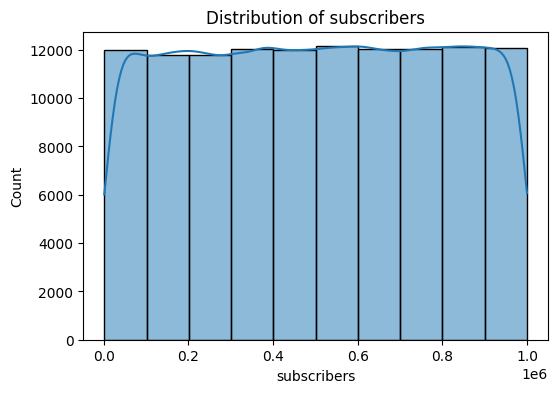

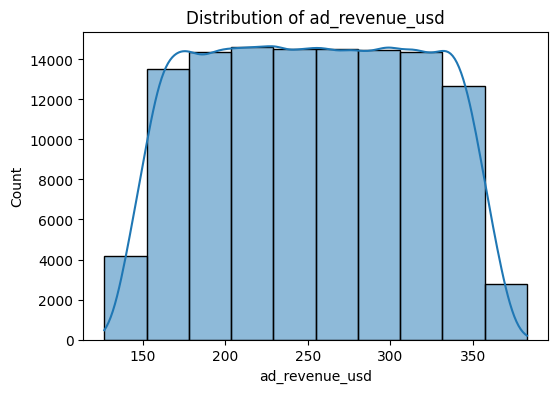

In [7]:


# if KDE (Kernel Density Estimation) needed then below sns type needd and for loop to plot one by one
# Plot histograms for all numeric columns
for col in numeric_cols:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[col], kde=True, bins=10)
    plt.title(f'Distribution of {col}')
    plt.show()


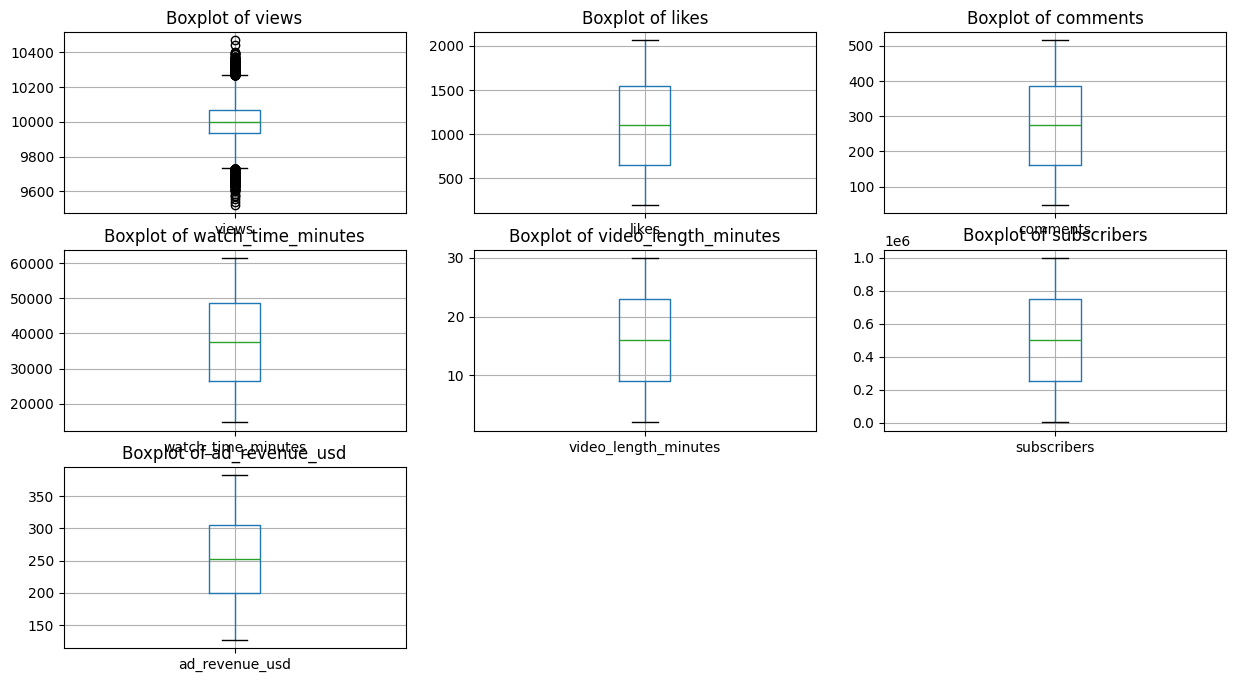

In [10]:

# To plot box plot (Just like histograms, boxplots are designed for numeric data only)

plt.figure(figsize=(15, 8))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(3, 3, i)  # Positioning: 3 rows, 3 columns
    df.boxplot(column=col)
    plt.title(f'Boxplot of {col}')

In [ ]:
# To plot one by ne we can use without enumerate direct column and for loop

for col in numeric_cols:
    
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.grid(True)
    plt.show()

**IQR method to check Outlier**

IQR Method (Boxplot logic)
What it checks: It calculates the Interquartile Range (IQR) — the middle 50% of your data.

Q1 = 25th percentile

Q3 = 75th percentile

IQR = Q3 − Q1

Outlier rule: Any value below Q1 − 1.5×IQR or above Q3 + 1.5×IQR is flagged as an outlier.

Best for: Skewed data or when you want a simple, rule-based method.

In [29]:
Q1 = df['views'].quantile(0.25)
Q3 = df['views'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers_iqr = df[(df['views'] < lower_bound) | (df['views'] > upper_bound)]
print("IQR Outliers:", outliers_iqr.shape[0])


IQR Outliers: 865


In [30]:
print(lower_bound)
print(upper_bound)

9732.0
10268.0


**Z Score method to check Oulier**
Z-score Method
What it checks: It measures how many standard deviations a value is from the mean.

Z-score = (𝑥−𝜇)/𝜎

Outlier rule: Any value with Z-score > +3 or < −3 is considered an outlier.

Best for: Normally distributed data. Assumes symmetry around the mean.

In [31]:
from scipy.stats import zscore

z_scores = zscore(df['views'])
threshold = 3
outliers_z = df[np.abs(z_scores) > threshold]
print("Z-score Outliers:", outliers_z.shape[0])


Z-score Outliers: 316


**Isolation Forest to check Outliers**

Isolation Forest
What it checks: It’s a machine learning model that isolates anomalies(outliers) by randomly selecting features and split values.

Outliers are easier to isolate → fewer splits needed

Outlier rule: It assigns a score based on how easily a point is isolated. Points with low scores are flagged as outliers.

✅ Best for: Complex, high-dimensional data. Doesn’t assume normality or symmetry.

In [ ]:
from sklearn.ensemble import IsolationForest

iso = IsolationForest(contamination=0.01, random_state=42)
df['outlier_iforest'] = iso.fit_predict(df[['views']])
outliers_iforest = df[df['outlier_iforest'] == -1]
print("Isolation Forest Outliers:", outliers_iforest.shape[0])


In [32]:
print(f"IQR Method: {outliers_iqr.shape[0]} outliers")
print(f"Z-score Method: {outliers_z.shape[0]} outliers")
#print(f"Isolation Forest: {outliers_iforest.shape[0]} outliers")


IQR Method: 865 outliers
Z-score Method: 316 outliers


In [34]:
df['Views_Outlier_Flag'] = df['views'].apply(lambda x: 1 if x < lower_bound or x > upper_bound else 0)


In [35]:
df['Views_Outlier_Flag'].value_counts()


Views_Outlier_Flag
0    119135
1       865
Name: count, dtype: int64

In [38]:
df.groupby('Views_Outlier_Flag')['ad_revenue_usd'].mean()

Views_Outlier_Flag
0    252.704833
1    253.610530
Name: ad_revenue_usd, dtype: float64

In [39]:
df.groupby('Views_Outlier_Flag')[['likes', 'comments', 'watch_time_minutes']].mean()


,likes,comments,watch_time_minutes
Views_Outlier_Flag,,,
0,1099.599344,274.329964,37539.053054
1,1097.594096,277.050420,37774.958940


In [40]:

df.groupby('Views_Outlier_Flag')[['ad_revenue_usd']].mean()

,ad_revenue_usd
Views_Outlier_Flag,
0,252.704833
1,253.610530


In [41]:
corr_matrix = df[numeric_cols].corr()
print(corr_matrix)


                         views     likes  comments  watch_time_minutes  \
views                 1.000000  0.015607  0.018597            0.026737   
likes                 0.015607  1.000000 -0.002138            0.002864   
comments              0.018597 -0.002138  1.000000           -0.000749   
watch_time_minutes    0.026737  0.002864 -0.000749            1.000000   
video_length_minutes  0.001171  0.001817 -0.002233           -0.000398   
subscribers           0.000750  0.003622 -0.001564            0.004734   
ad_revenue_usd        0.037942  0.146269  0.034494            0.988869   

                      video_length_minutes  subscribers  ad_revenue_usd  
views                             0.001171     0.000750        0.037942  
likes                             0.001817     0.003622        0.146269  
comments                         -0.002233    -0.001564        0.034494  
watch_time_minutes               -0.000398     0.004734        0.988869  
video_length_minutes              1.0

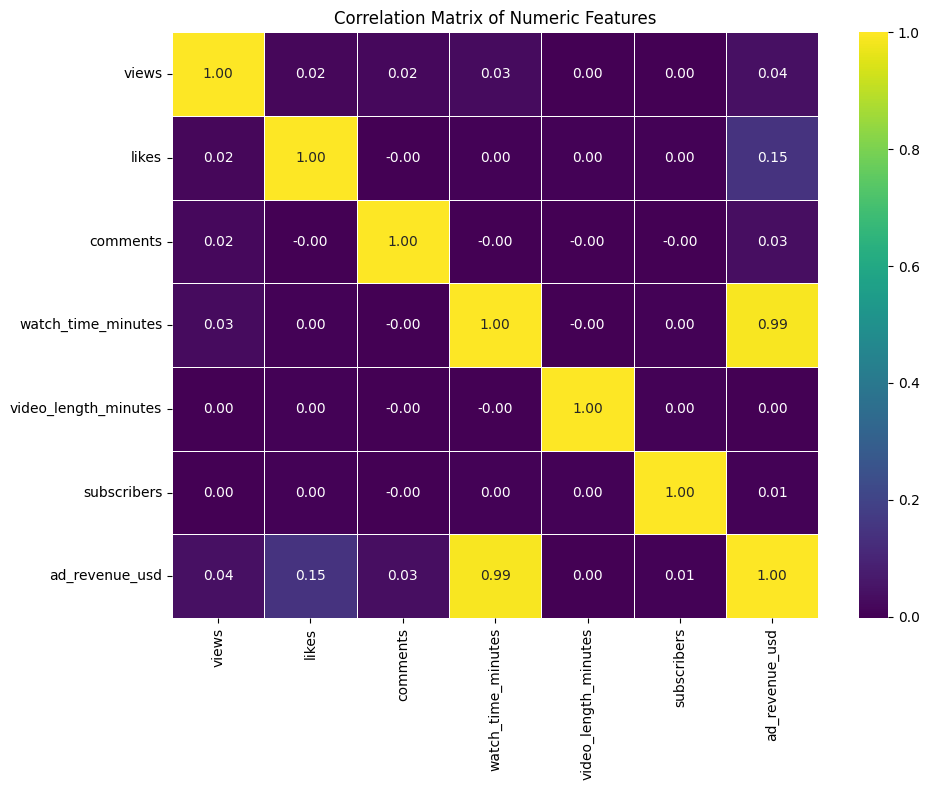

In [43]:
# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='viridis', fmt=".2f", linewidths=0.5) # cmap other option 'viridis', 'plasma', 'Blues', 'Greens', 'RdBu'
plt.title("Correlation Matrix of Numeric Features")
plt.tight_layout()
plt.show()

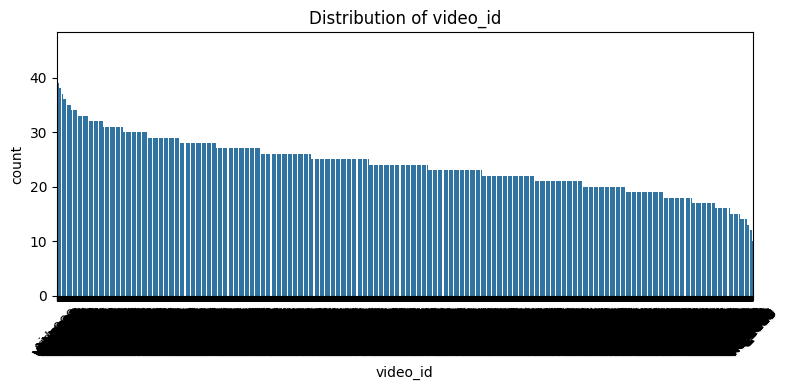

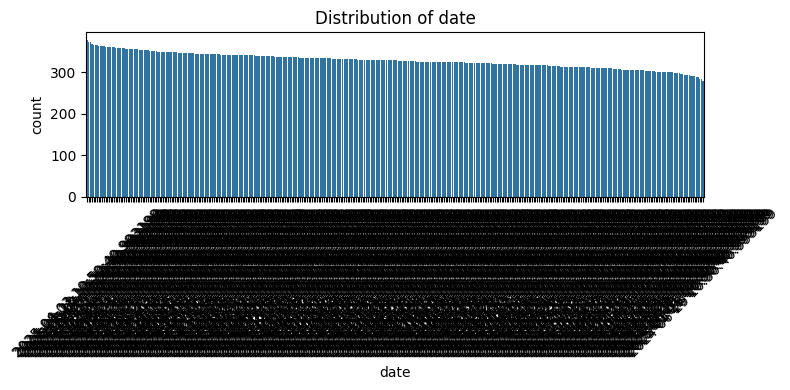

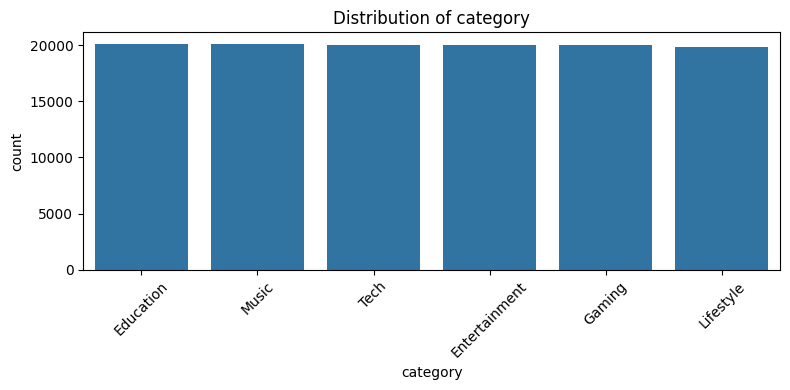

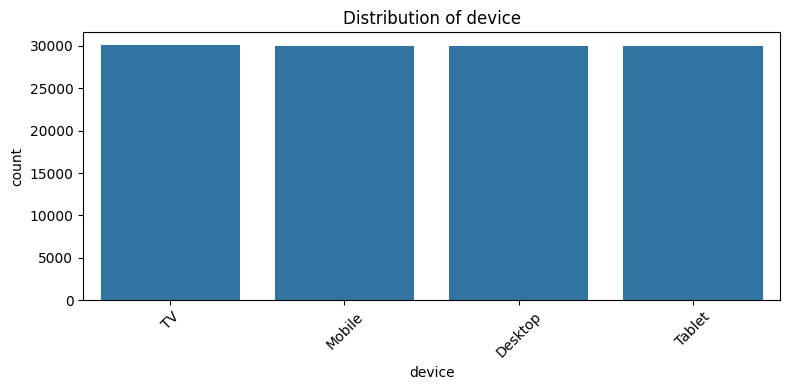

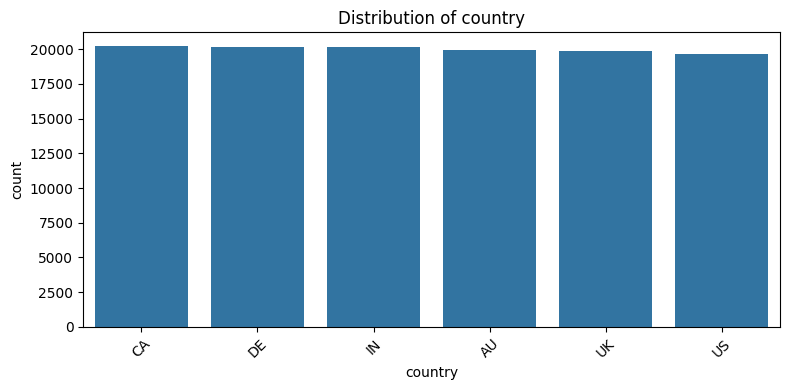

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt

for col in category_cols:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=df, x=col, order=df[col].value_counts().index)
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


In [ ]:
len(df['category'].unique())

In [ ]:
df.groupby(['category'])['likes'].median()


**Let's Try two method to handle Null value just to check we make a copy and try**

In [48]:
df_mean_median = df.copy()
df_knn = df.copy()


**Applying Mean/Median Imputation Method for Null handling**

In [66]:
# Fill numeric columns with median
df_mean_median['likes'] = df_mean_median['likes'].fillna(df_mean_median['likes'].median())
df_mean_median['comments'] = df_mean_median['comments'].fillna(df_mean_median['comments'].median())
df_mean_median['watch_time_minutes'] = df_mean_median['watch_time_minutes'].fillna(df_mean_median['watch_time_minutes'].median())


**Applying KNN Imputation Method for Null handling**

In [52]:
from sklearn.preprocessing import StandardScaler

#  Define this first
cols_with_na = ['likes', 'comments', 'watch_time_minutes']

df_knn[cols_with_na] = df_knn[cols_with_na].astype('float32')
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_knn[cols_with_na])

imputer = KNNImputer(n_neighbors=5)
imputed_scaled = imputer.fit_transform(scaled_data)

df_knn[cols_with_na] = scaler.inverse_transform(imputed_scaled)



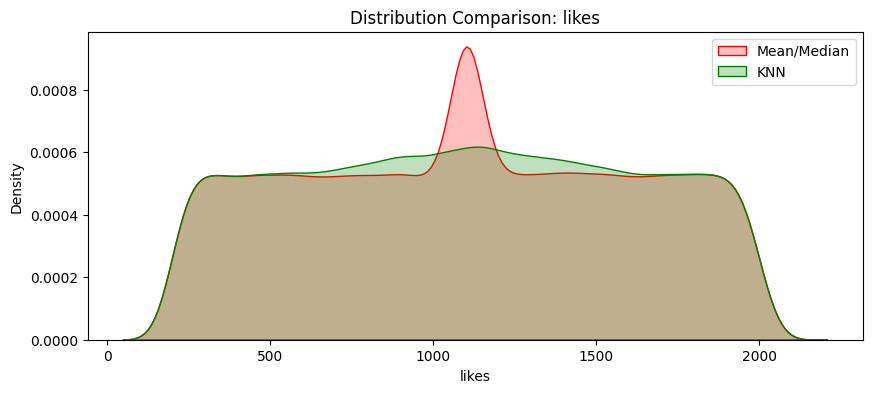

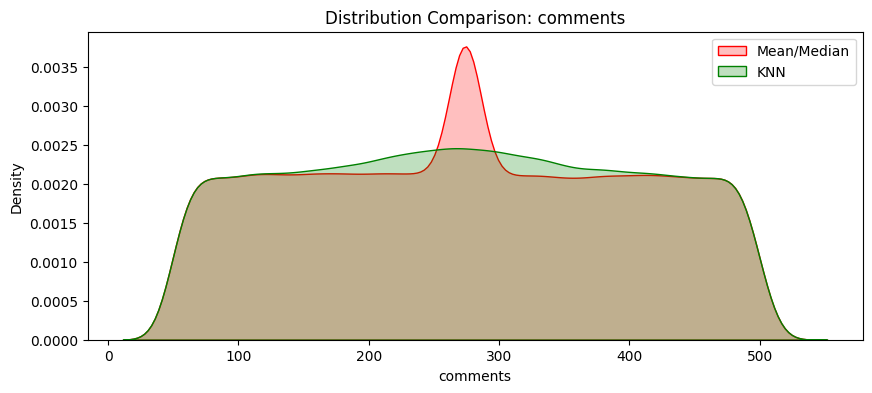

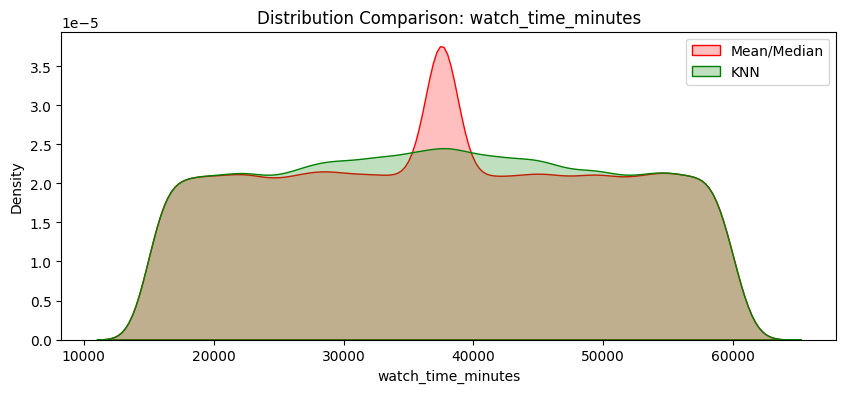

In [67]:
# Comparing both Mean/Median chanes and KNN changes below

for col in ['likes', 'comments', 'watch_time_minutes']:
    plt.figure(figsize=(10, 4))
    sns.kdeplot(df_mean_median[col], label='Mean/Median', fill=True, color='red')
    sns.kdeplot(df_knn[col], label='KNN', fill=True, color='green')
    plt.title(f'Distribution Comparison: {col}')
    plt.legend()
    plt.show()


**It looks KNN gives reasonable values but we made this KNN n temporary dummy data frame by copying fom original** 
**so now we can copy e updated colum from dummy data frame to our origingal data frame**

In [68]:
cols_to_update = ['likes', 'comments', 'watch_time_minutes']
df[cols_to_update] = df_knn[cols_to_update]


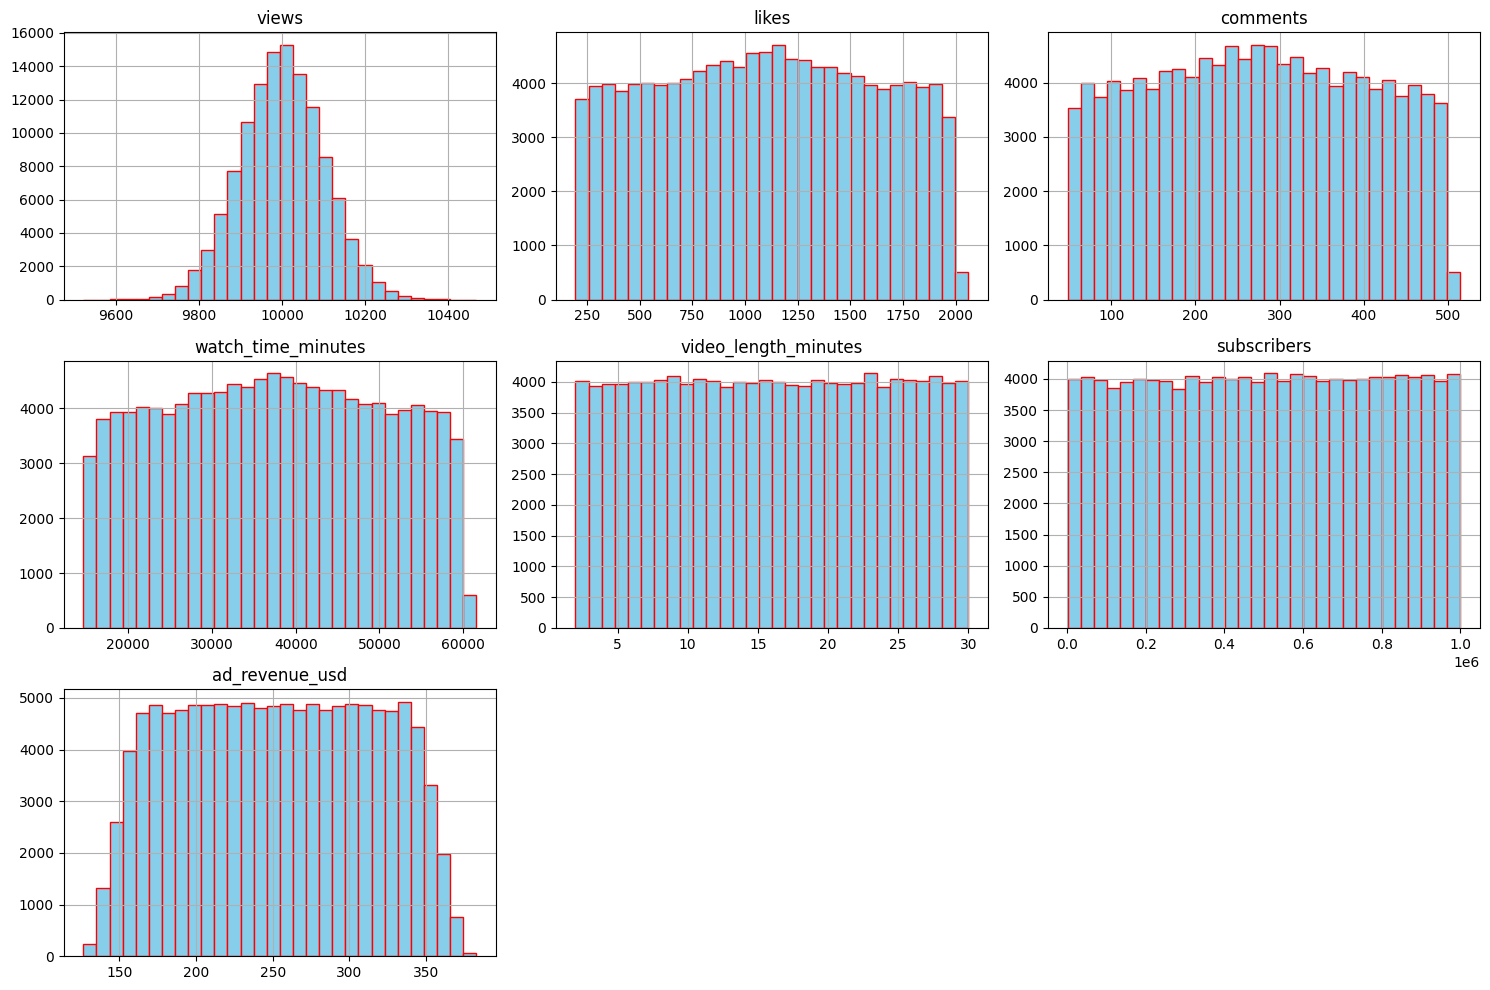

In [69]:
df[numeric_cols].hist(bins=30, figsize=(15, 10), color='skyblue', edgecolor='red')
plt.tight_layout()
plt.show()

In [70]:
# Drop non-numeric columns like video_id
numeric_df = df.select_dtypes(include='number')

# Now compute correlation
correlations = numeric_df.corr()['ad_revenue_usd'].sort_values(ascending=False)
print(correlations)


ad_revenue_usd          1.000000
watch_time_minutes      0.958674
likes                   0.141943
views                   0.037942
comments                0.033558
subscribers             0.005065
Views_Outlier_Flag      0.001237
video_length_minutes    0.000364
Name: ad_revenue_usd, dtype: float64


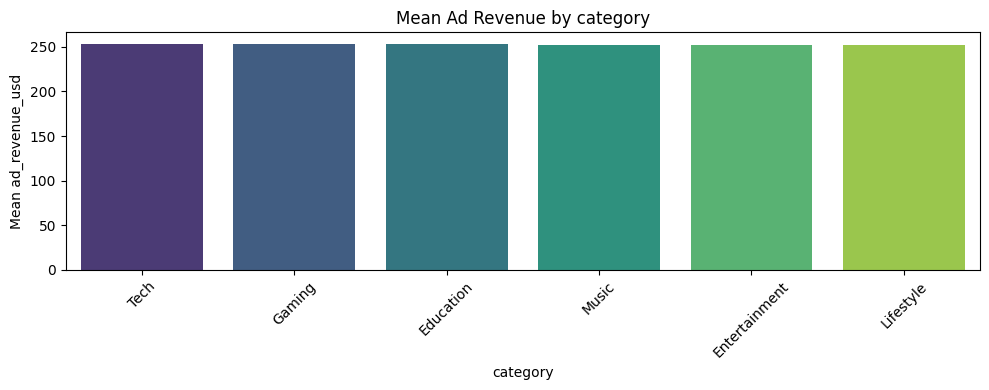

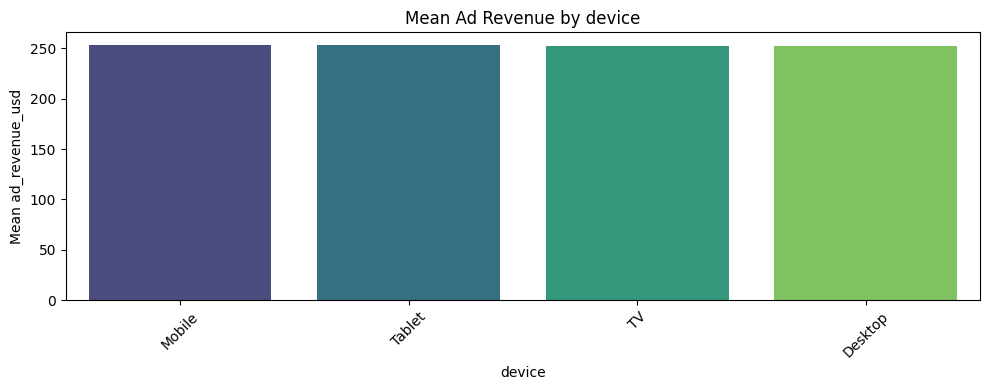

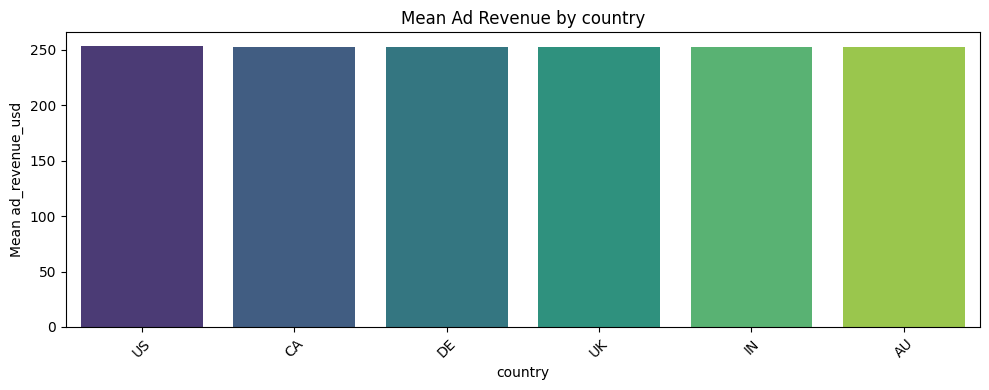

In [72]:
import matplotlib.pyplot as plt
import seaborn as sns

categorical_cols = ['category', 'device', 'country']  

for col in categorical_cols:
    plt.figure(figsize=(10, 4))
    mean_values = df.groupby(col)['ad_revenue_usd'].mean().sort_values(ascending=False)
    sns.barplot(x=mean_values.index, y=mean_values.values,hue=mean_values.index, palette='viridis')
    plt.title(f'Mean Ad Revenue by {col}')
    plt.ylabel('Mean ad_revenue_usd')
    plt.xlabel(col)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


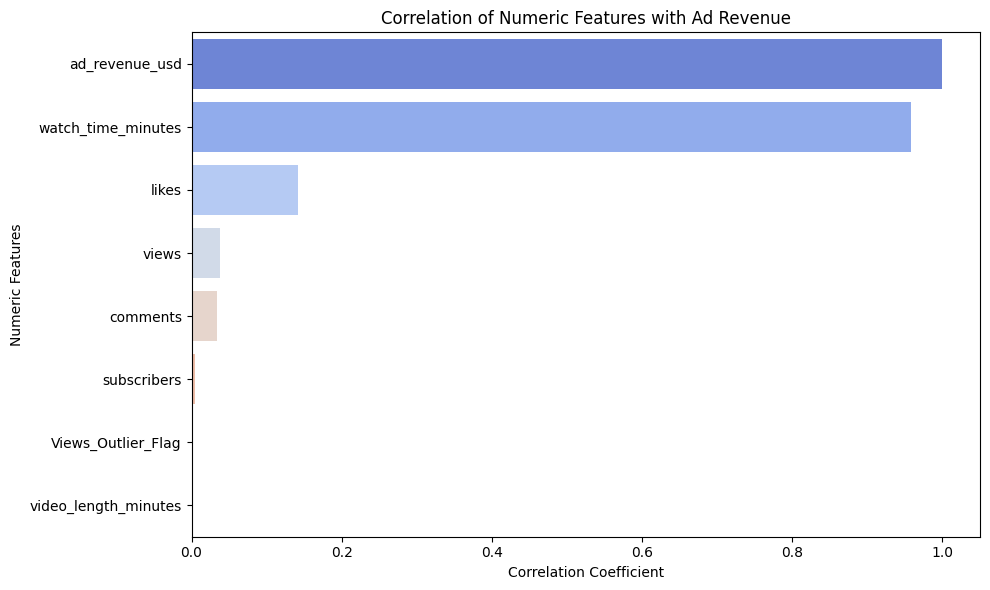

In [73]:
numeric_df = df.select_dtypes(include='number')
correlations = numeric_df.corr()['ad_revenue_usd'].sort_values(ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x=correlations.values, y=correlations.index,hue=correlations.index, palette='coolwarm')
plt.title('Correlation of Numeric Features with Ad Revenue')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Numeric Features')
plt.tight_layout()
plt.show()


**New Column Adding**

In [74]:
df['engagement_rate'] = (df['likes'] + df['comments']) / df['views']


In [75]:
df['watch_per_view'] = df['watch_time_minutes'] / df['views']


In [76]:
print(df[['engagement_rate', 'watch_per_view']].head())


   engagement_rate  watch_per_view
0         0.155093        2.666789
1         0.098632        1.518394
2         0.214519        5.678188
3         0.142814        3.122834
4         0.236121        1.584151


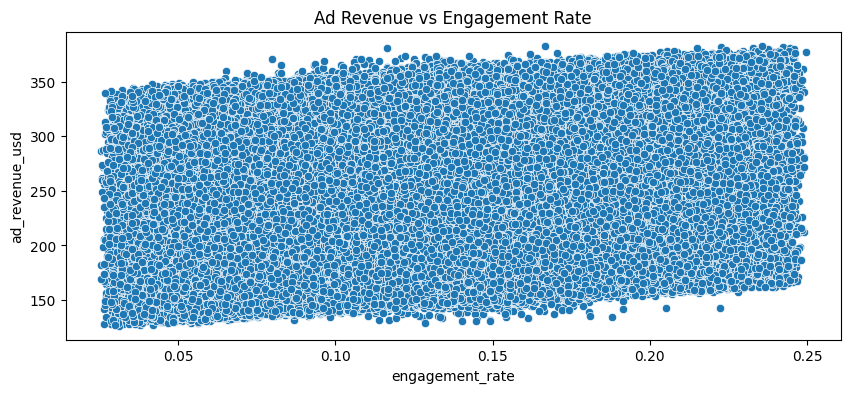

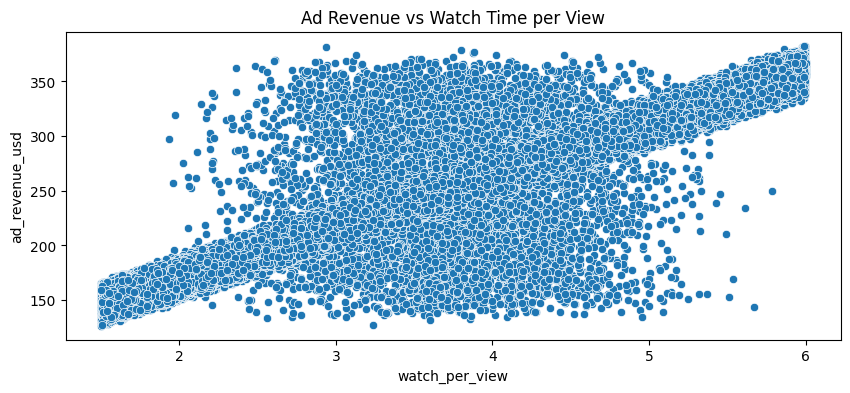

In [77]:


plt.figure(figsize=(10, 4))
sns.scatterplot(x='engagement_rate', y='ad_revenue_usd', data=df)
plt.title('Ad Revenue vs Engagement Rate')
plt.show()

plt.figure(figsize=(10, 4))
sns.scatterplot(x='watch_per_view', y='ad_revenue_usd', data=df)
plt.title('Ad Revenue vs Watch Time per View')
plt.show()


***We have different category columns  but ML needs only number not category so we **encode** them***
***and our Numeric column also in different ranges example some in 10 thousand some in few hunreds so make everthing in balance fomat so we **scale** them***

In [80]:

# one hot encode ( Other type is label encoe which cjanhe to number in same column itself)
df = pd.get_dummies(df, columns=['category', 'device', 'country'], drop_first=True)


In [81]:
X = df.drop(['ad_revenue_usd', 'video_id','date'], axis=1)  # Drop target and non-numeric ID
y = df['ad_revenue_usd']


In [82]:
print(X.dtypes)


views                       int64
likes                     float32
comments                  float32
watch_time_minutes        float32
video_length_minutes      float64
subscribers                 int64
Views_Outlier_Flag          int64
engagement_rate           float64
watch_per_view            float64
category_Entertainment       bool
category_Gaming              bool
category_Lifestyle           bool
category_Music               bool
category_Tech                bool
device_Mobile                bool
device_TV                    bool
device_Tablet                bool
country_CA                   bool
country_DE                   bool
country_IN                   bool
country_UK                   bool
country_US                   bool
dtype: object


In [102]:

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


**Training the Model**

In [103]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=5)


**1 Train Linear Regression Model**

In [104]:
from sklearn.linear_model import LinearRegression


lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

 # Make Predictions
y_pred_train = lr_model.predict(X_train)  # Predictions on training data
y_pred_test = lr_model.predict(X_test)    # Predictions on test data




In [ ]:
#EVALUATING to see train result and test result

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import numpy as np

#  Evaluate training performance
r2_train = r2_score(y_train, y_pred_train)
rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
mae_train = mean_absolute_error(y_train, y_pred_train)

# Evaluate test performance
r2_test = r2_score(y_test, y_pred_test)
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))
mae_test = mean_absolute_error(y_test, y_pred_test)

#Print results
print("Training Performance:")
print(f"R square Score: {r2_train:.4f}")
print(f"RMSE: {rmse_train:.4f}")
print(f"MAE: {mae_train:.4f}")

print("\nTest Performance:")
print(f"R square: {r2_test:.4f}")
print(f"RMSE: {rmse_test:.4f}")
print(f"MAE: {mae_test:.4f}")



📘 Training Performance:
R² Score: 0.9401
RMSE: 15.1515
MAE: 3.8071

📗 Test Performance:
R² Score: 0.9392
RMSE: 15.3164
MAE: 3.9133


**2 Train Ridge Regression Model**

In [87]:
from sklearn.linear_model import Ridge

ridge_model = Ridge()
ridge_model.fit(X_train, y_train)

# Make Predictions
y_pred_train_ridge = ridge_model.predict(X_train)  # Training predictions
y_pred_test_ridge = ridge_model.predict(X_test)    # Test predictions



In [ ]:
#EVALUATING TRAIN MODEL

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import numpy as np

# Evaluate training performance
r2_train_ridge = r2_score(y_train, y_pred_train_ridge)
rmse_train_ridge = np.sqrt(mean_squared_error(y_train, y_pred_train_ridge))
mae_train_ridge = mean_absolute_error(y_train, y_pred_train_ridge)

#Evaluate test performance
r2_test_ridge = r2_score(y_test, y_pred_test_ridge)
rmse_test_ridge = np.sqrt(mean_squared_error(y_test, y_pred_test_ridge))
mae_test_ridge = mean_absolute_error(y_test, y_pred_test_ridge)

#Print results
print("Ridge Regression - Training Performance:")
print(f"R square: {r2_train_ridge:.4f}")
print(f"RMSE: {rmse_train_ridge:.4f}")
print(f"MAE: {mae_train_ridge:.4f}")

print("\nRidge Regression - Test Performance:")
print(f"R square: {r2_test_ridge:.4f}")
print(f"RMSE: {rmse_test_ridge:.4f}")
print(f"MAE: {mae_test_ridge:.4f}")



📘 Ridge Regression - Training Performance:
R² Score: 0.9401
RMSE: 15.1516
MAE: 3.8073

📗 Ridge Regression - Test Performance:
R² Score: 0.9392
RMSE: 15.3167
MAE: 3.9131


**3 Train  ModelDecision Tree Regressor**

In [89]:
from sklearn.tree import DecisionTreeRegressor

dt_model = DecisionTreeRegressor(random_state=5)
dt_model.fit(X_train, y_train)

# Make Predictions
y_pred_train_dt = dt_model.predict(X_train)  # Training predictions
y_pred_test_dt = dt_model.predict(X_test)    # Test predictions



In [ ]:
#EVALUATING TRAIN MODEL

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import numpy as np

#Evaluate training performance
r2_train_dt = r2_score(y_train, y_pred_train_dt)
rmse_train_dt = np.sqrt(mean_squared_error(y_train, y_pred_train_dt))
mae_train_dt = mean_absolute_error(y_train, y_pred_train_dt)

#Evaluate test performance
r2_test_dt = r2_score(y_test, y_pred_test_dt)
rmse_test_dt = np.sqrt(mean_squared_error(y_test, y_pred_test_dt))
mae_test_dt = mean_absolute_error(y_test, y_pred_test_dt)

#Print results
print("Decision Tree - Training Performance:")
print(f"R square: {r2_train_dt:.4f}")
print(f"RMSE: {rmse_train_dt:.4f}")
print(f"MAE: {mae_train_dt:.4f}")

print("\nDecision Tree - Test Performance:")
print(f"R square: {r2_test_dt:.4f}")
print(f"RMSE: {rmse_test_dt:.4f}")
print(f"MAE: {mae_test_dt:.4f}")




📘 Decision Tree - Training Performance:
R² Score: 1.0000
RMSE: 0.0000
MAE: 0.0000

📗 Decision Tree - Test Performance:
R² Score: 0.8701
RMSE: 22.3935
MAE: 7.6401


**4 Train Random Forest Regressor**

In [91]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(random_state=5)
rf_model.fit(X_train, y_train)

# Make Predictions
y_pred_train_rf = rf_model.predict(X_train)  # Training predictions
y_pred_test_rf = rf_model.predict(X_test)    # Test predictions




In [ ]:
#EVALUATING TRAIN MODEL

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import numpy as np

#Evaluate training performance
r2_train_rf = r2_score(y_train, y_pred_train_rf)
rmse_train_rf = np.sqrt(mean_squared_error(y_train, y_pred_train_rf))
mae_train_rf = mean_absolute_error(y_train, y_pred_train_rf)

#Evaluate test performance
r2_test_rf = r2_score(y_test, y_pred_test_rf)
rmse_test_rf = np.sqrt(mean_squared_error(y_test, y_pred_test_rf))
mae_test_rf = mean_absolute_error(y_test, y_pred_test_rf)

#Print results
print("Random Forest - Training Performance:")
print(f"R square Score: {r2_train_rf:.4f}")
print(f"RMSE: {rmse_train_rf:.4f}")
print(f"MAE: {mae_train_rf:.4f}")

print("\nRandom Forest - Test Performance:")
print(f"R square Score: {r2_test_rf:.4f}")
print(f"RMSE: {rmse_test_rf:.4f}")
print(f"MAE: {mae_test_rf:.4f}")



📘 Random Forest - Training Performance:
R² Score: 0.9911
RMSE: 5.8350
MAE: 2.0459

📗 Random Forest - Test Performance:
R² Score: 0.9360
RMSE: 15.7230
MAE: 5.4007


**5 Train XGBoost Regressor**

In [95]:
from xgboost import XGBRegressor

xgb_model = XGBRegressor(random_state=5)
xgb_model.fit(X_train, y_train)


# Make Predictions
y_pred_train_xgb = xgb_model.predict(X_train)  # Training predictions
y_pred_test_xgb = xgb_model.predict(X_test)    # Test predictions


In [ ]:
#EVALUATING TRAIN MODEL

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import numpy as np

#Evaluate training performance
r2_train_xgb = r2_score(y_train, y_pred_train_xgb)
rmse_train_xgb = np.sqrt(mean_squared_error(y_train, y_pred_train_xgb))
mae_train_xgb = mean_absolute_error(y_train, y_pred_train_xgb)

#Evaluate test performance
r2_test_xgb = r2_score(y_test, y_pred_test_xgb)
rmse_test_xgb = np.sqrt(mean_squared_error(y_test, y_pred_test_xgb))
mae_test_xgb = mean_absolute_error(y_test, y_pred_test_xgb)

#Print results
print("XGBoost - Training Performance:")
print(f"R square Score: {r2_train_xgb:.4f}")
print(f"RMSE: {rmse_train_xgb:.4f}")
print(f"MAE: {mae_train_xgb:.4f}")

print("\nXGBoost - Test Performance:")
print(f"R square Score: {r2_test_xgb:.4f}")
print(f"RMSE: {rmse_test_xgb:.4f}")
print(f"MAE: {mae_test_xgb:.4f}")


📘 XGBoost - Training Performance:
R² Score: 0.9524
RMSE: 13.5033
MAE: 4.6301

📗 XGBoost - Test Performance:
R² Score: 0.9370
RMSE: 15.6010
MAE: 5.4153


In [109]:
from sklearn.preprocessing import StandardScaler
import pickle

# Befor giving train to model we scaled the input so we need to save scaler also to use in streamlit or application
# Save the scaler correctly
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

# This saves the fitted StandardScaler so it can be reused during prediction.

# Save the model
with open('final_lr_model.pkl', 'wb') as f:
    pickle.dump(lr_model, f)

# This saves the trained Linear Regression model to a .pkl file for future use.


In [100]:
X.columns.tolist()


['views',
 'likes',
 'comments',
 'watch_time_minutes',
 'video_length_minutes',
 'subscribers',
 'Views_Outlier_Flag',
 'engagement_rate',
 'watch_per_view',
 'category_Entertainment',
 'category_Gaming',
 'category_Lifestyle',
 'category_Music',
 'category_Tech',
 'device_Mobile',
 'device_TV',
 'device_Tablet',
 'country_CA',
 'country_DE',
 'country_IN',
 'country_UK',
 'country_US']